# Dal paper "Public Goods on Networks"

Strategia finale (1 = contribuisce, 0 = non contribuisce): [1, 0, 0, 1, 1, 0]


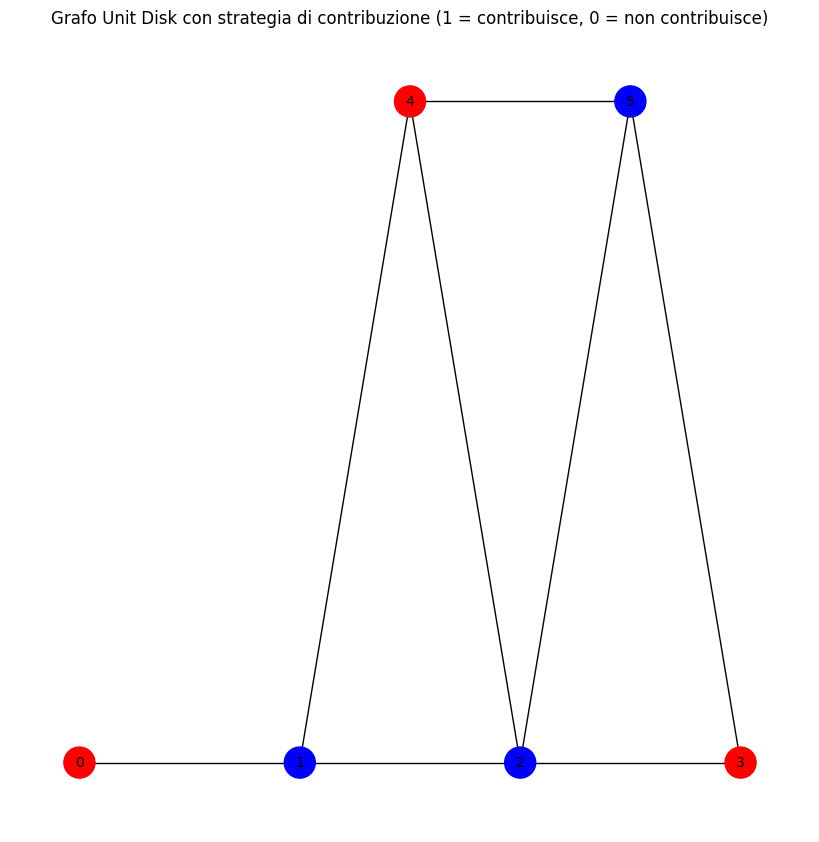

La strategia è un Maximal Independent Set (MIS).
La strategia finale forma un MIS? True
La strategia finale è un equilibrio di Nash? True


In [59]:
import numpy as np
import networkx as nx
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random

# Posizioni dei nodi e raggio di interazione
posizioni =  [
    (0, 0),      # Nodo 1
    (6, 0),      # Nodo 2
    (12, 0),     # Nodo 3
    (18, 0),     # Nodo 4
    (9, 6),      # Nodo 5
    (15, 6)      # Nodo 6
]
Rb = 9.1  # Raggio di interazione

# Parametri del gioco
costo_contribuzione = 0.5  # Costo che paga il giocatore che contribuisce (marginal cost c)
e_star = 1  # Equilibrium effort e*
beneficio_totale = 10  # Beneficio massimo possibile

num_iterazioni = 100  # Numero di iterazioni per raggiungere l'equilibrio di Nash

# Funzione di beneficio concava: b(x) = sqrt(x)
def funzione_beneficio(x):
    return np.sqrt(x)

# Derivata prima di b(x), per il calcolo dell'equilibrio marginale
def derivata_beneficio(x):
    return 0.5 / np.sqrt(x)

# Calcola la matrice delle distanze
posizioni_array = np.array(posizioni)
distanze = distance_matrix(posizioni_array, posizioni_array)

# Crea un grafo in cui i nodi sono collegati se la distanza è <= Rb
G = nx.Graph()
for i in range(len(posizioni)):
    for j in range(i + 1, len(posizioni)):
        if distanze[i][j] <= Rb:
            G.add_edge(i, j)

# Funzione per calcolare il payoff di un singolo nodo come descritto nel paper
def calcola_payoff(G, strategia, nodo, costo_contribuzione):
    # Sforzo dell'agente i (1 = contribuisce, 0 = non contribuisce)
    e_i = strategia[nodo]
    
    # Somma degli sforzi dei vicini
    sforzi_vicini = sum(strategia[vicino] for vicino in G.neighbors(nodo))
    
    # Beneficio totale derivato dal proprio contributo e da quello dei vicini
    beneficio_totale = funzione_beneficio(e_i + sforzi_vicini)
    
    # Costo se contribuisce
    costo = e_i * costo_contribuzione
    
    # Payoff finale
    payoff = beneficio_totale - costo
    return payoff

# Funzione per verificare se una strategia rispetta il Maximal Independent Set (MIS)
def verifica_mis(G, strategia):
    contribuenti = [nodo for nodo in G.nodes() if strategia[nodo] == 1]
    
    # Verifica che nessun contribuente abbia un vicino contribuente
    for nodo in contribuenti:
        for vicino in G.neighbors(nodo):
            if strategia[vicino] == 1:
                print(f"I nodi {nodo} e {vicino} contribuiscono entrambi e sono adiacenti. Non è un MIS.")
                return False
    
    # Verifica che ogni free-rider abbia almeno un vicino contribuente
    for nodo in G.nodes():
        if strategia[nodo] == 0:  # Se è un free-rider
            vicini_contribuenti = [vicino for vicino in G.neighbors(nodo) if strategia[vicino] == 1]
            if not vicini_contribuenti:
                print(f"Il nodo {nodo} non ha vicini contribuenti. Non è un MIS.")
                return False
    
    print("La strategia è un Maximal Independent Set (MIS).")
    return True

# Funzione per eseguire iterazioni per raggiungere un equilibrio di Nash
def iterazioni_nash(G, strategia_iniziale, num_iterazioni, costo_contribuzione):
    strategia = strategia_iniziale.copy()
    
    for _ in range(num_iterazioni):
        for nodo in G.nodes():
            # Calcola il payoff corrente per il nodo
            payoff_corrente = calcola_payoff(G, strategia, nodo, costo_contribuzione)
            
            # Cambia temporaneamente la strategia del nodo
            strategia_alternativa = strategia.copy()
            strategia_alternativa[nodo] = 1 - strategia[nodo]
            
            # Calcola il nuovo payoff se cambia strategia
            payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
            
            # Se il nuovo payoff è migliore, cambia strategia
            if payoff_nuovo > payoff_corrente:
                strategia[nodo] = strategia_alternativa[nodo]
    
    return strategia

# Genera una strategia iniziale casuale
def genera_strategia_iniziale(G):
    return [random.choice([0, 1]) for _ in G.nodes()]

# Visualizza il grafo con la strategia colorata
def plot_grafo(posizioni, G, strategia):
    plt.figure(figsize=(8, 8))
    pos_dict = {i: pos for i, pos in enumerate(posizioni)}
    
    # Disegna i nodi e i bordi
    node_colors = ['red' if strategia[i] == 1 else 'blue' for i in G.nodes()]  # Contributori in rosso, free-riders in blu
    nx.draw(G, pos=pos_dict, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
    
    plt.title("Grafo Unit Disk con strategia di contribuzione (1 = contribuisce, 0 = non contribuisce)")
    plt.show()

# Crea una strategia iniziale casuale
strategia_iniziale = genera_strategia_iniziale(G)

# Esegui le iterazioni per cercare un equilibrio di Nash
strategia_finale = iterazioni_nash(G, strategia_iniziale, num_iterazioni, costo_contribuzione)

# Stampa la strategia finale
print("Strategia finale (1 = contribuisce, 0 = non contribuisce):", strategia_finale)

# Visualizza il grafo con la strategia finale colorata
plot_grafo(posizioni, G, strategia_finale)

# Verifica se la strategia finale è un equilibrio di Nash
def verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
    for nodo in G.nodes():
        # Calcola il payoff corrente
        payoff_corrente = calcola_payoff(G, strategia, nodo, costo_contribuzione)
        
        # Prova a cambiare strategia e verifica il nuovo payoff
        strategia_alternativa = strategia.copy()
        strategia_alternativa[nodo] = 1 - strategia[nodo]  # Cambia la strategia
        payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
        
        # Se il nuovo payoff è maggiore, non è un equilibrio di Nash
        if payoff_nuovo > payoff_corrente:
            print(f"Il nodo {nodo} può migliorare il suo payoff cambiando strategia.")
            return False
    return True

# Verifica se la strategia finale è un Maximal Independent Set (MIS)
is_mis = verifica_mis(G, strategia_finale)
print("La strategia finale forma un MIS?", is_mis)

# Verifica se la strategia finale è un equilibrio di Nash
is_nash = verifica_nash_equilibrio_con_payoff(G, strategia_finale, costo_contribuzione)
print("La strategia finale è un equilibrio di Nash?", is_nash)


In [60]:
# Funzione per verificare se una strategia è un ottimo di Pareto e stampare il payoff totale
def verifica_ottimo_di_pareto(G, strategia, costo_contribuzione):
    # Calcola il payoff corrente per ogni nodo e il payoff totale nella strategia attuale
    payoff_corrente = {nodo: calcola_payoff(G, strategia, nodo, costo_contribuzione) for nodo in G.nodes()}
    payoff_totale_corrente = sum(payoff_corrente.values())
    
    print(f"\nPayoff totale con la strategia finale: {payoff_totale_corrente}")

    # Controlla se esiste una strategia alternativa che possa migliorare il payoff di almeno un nodo senza peggiorare quello degli altri
    for nodo in G.nodes():
        # Prova a cambiare la strategia del nodo corrente
        strategia_alternativa = strategia.copy()
        strategia_alternativa[nodo] = 1 - strategia[nodo]  # Cambia la strategia di contribuzione (0 -> 1 o 1 -> 0)
        
        # Calcola il payoff per ogni nodo con la strategia alternativa e il payoff totale alternativo
        payoff_alternativo = {nodo: calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione) for nodo in G.nodes()}
        payoff_totale_alternativo = sum(payoff_alternativo.values())
        
        print(f"\nPayoff totale con strategia alternativa (nodo {nodo} cambiato): {payoff_totale_alternativo}")
        
        # Verifica se il cambio ha migliorato il payoff di almeno un nodo senza peggiorare quello degli altri
        miglioramento = False
        for nodo in G.nodes():
            if payoff_alternativo[nodo] > payoff_corrente[nodo]:  # Miglioramento per almeno un nodo
                miglioramento = True
            elif payoff_alternativo[nodo] < payoff_corrente[nodo]:  # Peggioramento per almeno un nodo
                miglioramento = False
                break
        
        # Se troviamo una strategia alternativa che migliora il payoff di almeno un nodo senza peggiorare quello degli altri,
        # allora la strategia attuale non è un ottimo di Pareto
        if miglioramento:
            print("\nLa strategia corrente non è un ottimo di Pareto.")
            return False
    
    print("\nLa strategia corrente è un ottimo di Pareto.")
    return True

La strategia finale è un equilibrio di Nash? True
La strategia è un Maximal Independent Set (MIS).
La strategia finale forma un MIS? True

Payoff totale con la strategia finale: 5.742640687119285

Payoff totale con strategia alternativa (nodo 0 cambiato): 4.82842712474619

Payoff totale con strategia alternativa (nodo 1 cambiato): 6.70674230225704

Payoff totale con strategia alternativa (nodo 2 cambiato): 7.024579547452822

Payoff totale con strategia alternativa (nodo 4 cambiato): 4.0

Payoff totale con strategia alternativa (nodo 3 cambiato): 4.414213562373095

Payoff totale con strategia alternativa (nodo 5 cambiato): 6.706742302257039

La strategia corrente è un ottimo di Pareto.
La strategia finale è un ottimo di Pareto? True


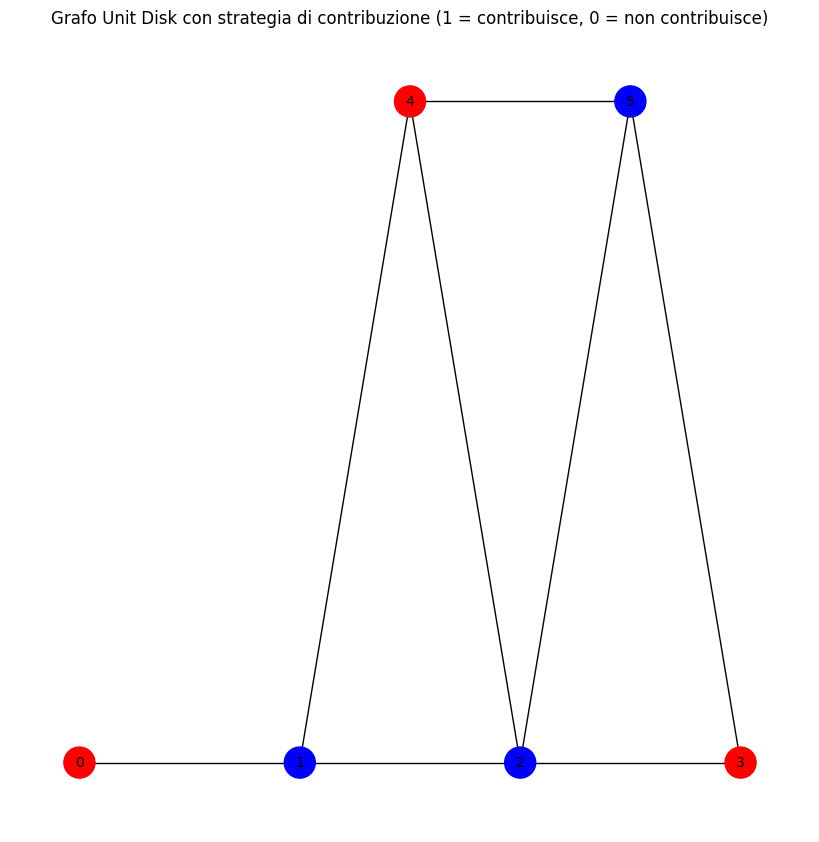

In [61]:
# Verifica se la strategia finale è un equilibrio di Nash
is_nash = verifica_nash_equilibrio_con_payoff(G, strategia_finale, costo_contribuzione)
print("La strategia finale è un equilibrio di Nash?", is_nash)

# Verifica se la strategia finale è un Maximal Independent Set (MIS)
is_mis = verifica_mis(G, strategia_finale)
print("La strategia finale forma un MIS?", is_mis)

# Verifica se la strategia finale è anche un ottimo di Pareto
is_pareto = verifica_ottimo_di_pareto(G, strategia_finale, costo_contribuzione)
print("La strategia finale è un ottimo di Pareto?", is_pareto)
# Visualizza il grafo con la strategia finale colorata
plot_grafo(posizioni, G, strategia_finale)

In [62]:
def verifica_ottimo_di_pareto(G, strategia, costo_contribuzione):
    # Calcola il payoff corrente per ogni nodo e il payoff totale
    payoff_corrente = {nodo: calcola_payoff(G, strategia, nodo, costo_contribuzione) for nodo in G.nodes()}
    
    print(f"\nPayoff corrente di ogni nodo: {payoff_corrente}")
    payoff_totale_corrente = sum(payoff_corrente.values())
    print(f"Payoff totale con la strategia attuale: {payoff_totale_corrente}")

    # Verifica ogni possibile cambiamento di strategia per ogni nodo
    for nodo in G.nodes():
        # Prova a cambiare la strategia del nodo corrente
        strategia_alternativa = strategia.copy()
        strategia_alternativa[nodo] = 1 - strategia[nodo]  # Cambia strategia del nodo (0 -> 1 o 1 -> 0)
        
        # Calcola il payoff per ogni nodo con la strategia alternativa
        payoff_alternativo = {nodo: calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione) for nodo in G.nodes()}
        payoff_totale_alternativo = sum(payoff_alternativo.values())
        
        print(f"\nPayoff alternativo cambiando il nodo {nodo}: {payoff_alternativo}")
        print(f"Payoff totale alternativo: {payoff_totale_alternativo}")

        # Confronta i payoff per ogni nodo
        miglioramento_per_nodo = False
        peggioramento = False
        for n in G.nodes():
            if payoff_alternativo[n] > payoff_corrente[n]:
                miglioramento_per_nodo = True  # Almeno un nodo migliora
            elif payoff_alternativo[n] < payoff_corrente[n]:
                peggioramento = True  # Almeno un nodo peggiora

        # Se almeno un nodo migliora senza peggiorare nessun altro, non è un Ottimo di Pareto
        if miglioramento_per_nodo and not peggioramento:
            print(f"\nUna strategia alternativa migliora il payoff del nodo {nodo} senza peggiorare altri.")
            print("La strategia corrente NON è un Ottimo di Pareto.")
            return False

    print("\nLa strategia corrente è un Ottimo di Pareto.")
    return True


La strategia finale è un equilibrio di Nash? True
La strategia è un Maximal Independent Set (MIS).
La strategia finale forma un MIS? True

Payoff corrente di ogni nodo: {0: 0.5, 1: 1.4142135623730951, 2: 1.4142135623730951, 4: 0.5, 3: 0.5, 5: 1.4142135623730951}
Payoff totale con la strategia attuale: 5.742640687119285

Payoff alternativo cambiando il nodo 0: {0: 0.0, 1: 1.0, 2: 1.4142135623730951, 4: 0.5, 3: 0.5, 5: 1.4142135623730951}
Payoff totale alternativo: 4.82842712474619

Payoff alternativo cambiando il nodo 1: {0: 0.9142135623730951, 1: 1.2320508075688772, 2: 1.7320508075688772, 4: 0.9142135623730951, 3: 0.5, 5: 1.4142135623730951}
Payoff totale alternativo: 6.70674230225704

Payoff alternativo cambiando il nodo 2: {0: 0.5, 1: 1.7320508075688772, 2: 1.2320508075688772, 4: 0.9142135623730951, 3: 0.9142135623730951, 5: 1.7320508075688772}
Payoff totale alternativo: 7.024579547452822

Payoff alternativo cambiando il nodo 4: {0: 0.5, 1: 1.0, 2: 1.0, 4: 0.0, 3: 0.5, 5: 1.0}
Payoff

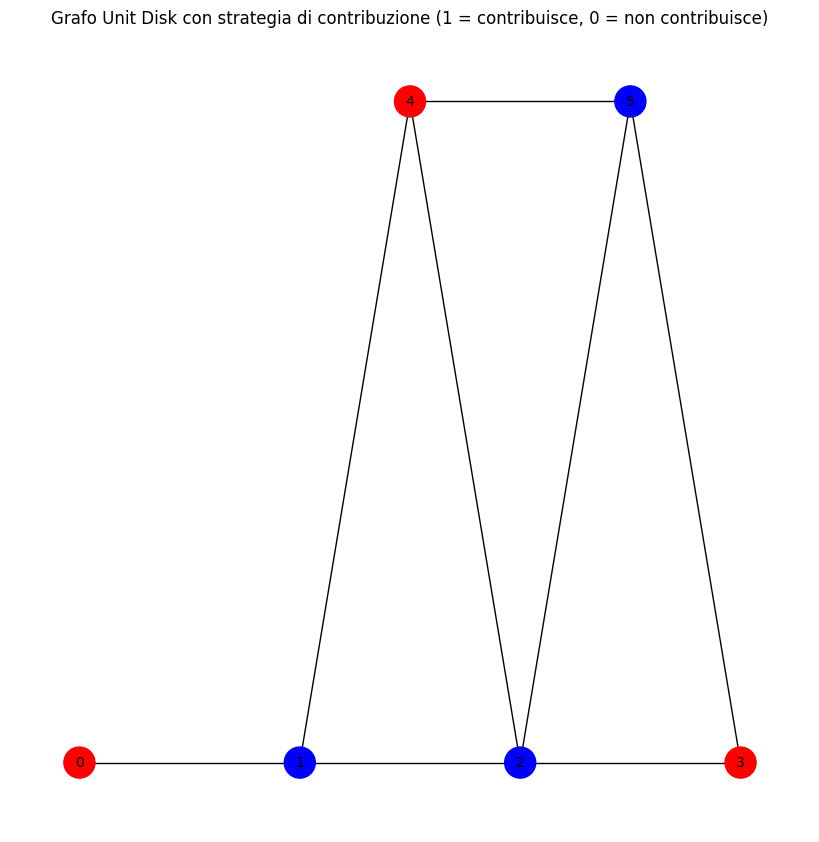

In [63]:
# Verifica se la strategia finale è un equilibrio di Nash
is_nash = verifica_nash_equilibrio_con_payoff(G, strategia_finale, costo_contribuzione)
print("La strategia finale è un equilibrio di Nash?", is_nash)

# Verifica se la strategia finale è un Maximal Independent Set (MIS)
is_mis = verifica_mis(G, strategia_finale)
print("La strategia finale forma un MIS?", is_mis)

# Verifica se la strategia finale è anche un ottimo di Pareto
is_pareto = verifica_ottimo_di_pareto(G, strategia_finale, costo_contribuzione)
print("La strategia finale è un ottimo di Pareto?", is_pareto)
# Visualizza il grafo con la strategia finale colorata
plot_grafo(posizioni, G, strategia_finale)

### Stabilità 


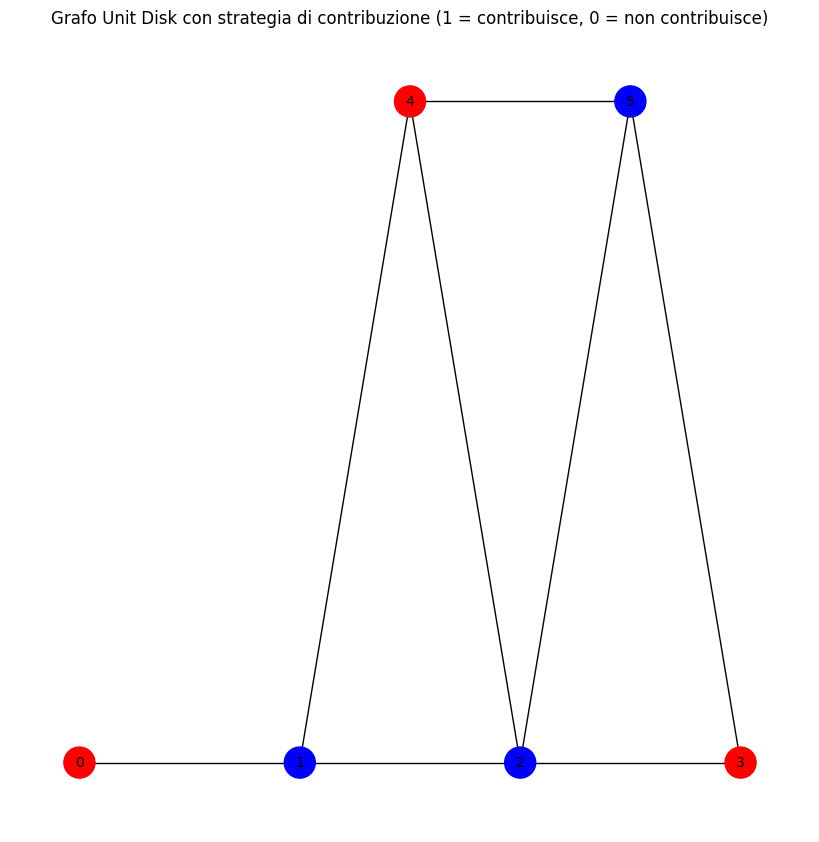

In [64]:
plot_grafo(posizioni, G, strategia_finale)

In [65]:
def verifica_stabilita_best_response(G, strategia, costo_contribuzione, num_iterazioni=100):
    strategia_corrente = strategia.copy()
    
    for _ in range(num_iterazioni):
        cambiato = False
        for nodo in G.nodes():
            # Calcola il payoff attuale del nodo
            payoff_corrente = calcola_payoff(G, strategia_corrente, nodo, costo_contribuzione)
            
            # Prova a cambiare strategia
            strategia_alternativa = strategia_corrente.copy()
            strategia_alternativa[nodo] = 1 - strategia_corrente[nodo]  # Cambia la strategia
            
            # Calcola il nuovo payoff
            payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
            
            # Se il nuovo payoff è migliore, cambia strategia
            if payoff_nuovo > payoff_corrente:
                strategia_corrente[nodo] = strategia_alternativa[nodo]
                cambiato = True
        
        # Se non ci sono cambiamenti, l'equilibrio è stabile
        if not cambiato:
            print("L'equilibrio di Nash è stabile sotto Best-Response Dynamics.")
            return True

    print("L'equilibrio di Nash non è stabile: continua a cambiare sotto Best-Response Dynamics.")
    return False

# Test della stabilità
is_stable = verifica_stabilita_best_response(G, strategia_finale, costo_contribuzione)
print("Stabilità dell'equilibrio di Nash:", is_stable)


L'equilibrio di Nash è stabile sotto Best-Response Dynamics.
Stabilità dell'equilibrio di Nash: True


In [66]:
def verifica_stabilita_globale(G, strategia_target, costo_contribuzione, num_iterazioni=100, num_iniziali=10):
    for _ in range(num_iniziali):
        # Genera una strategia iniziale casuale
        strategia_iniziale = [random.choice([0, 1]) for _ in G.nodes()]
        
        # Esegui le iterazioni di Nash
        strategia_convergente = iterazioni_nash(G, strategia_iniziale, num_iterazioni, costo_contribuzione)
        
        # Confronta la strategia convergente con la strategia target
        if strategia_convergente != strategia_target:
            print("La configurazione non è globalmente stabile: altre configurazioni portano a diversi equilibri.")
            return False
    
    print("La configurazione è globalmente stabile: tutte le configurazioni convergono all'equilibrio target.")
    return True

# Test della stabilità globale
is_globally_stable = verifica_stabilita_globale(G, strategia_finale, costo_contribuzione)
print("Stabilità globale dell'equilibrio di Nash:", is_globally_stable)


La configurazione non è globalmente stabile: altre configurazioni portano a diversi equilibri.
Stabilità globale dell'equilibrio di Nash: False


## Robustezza a perturbazioni

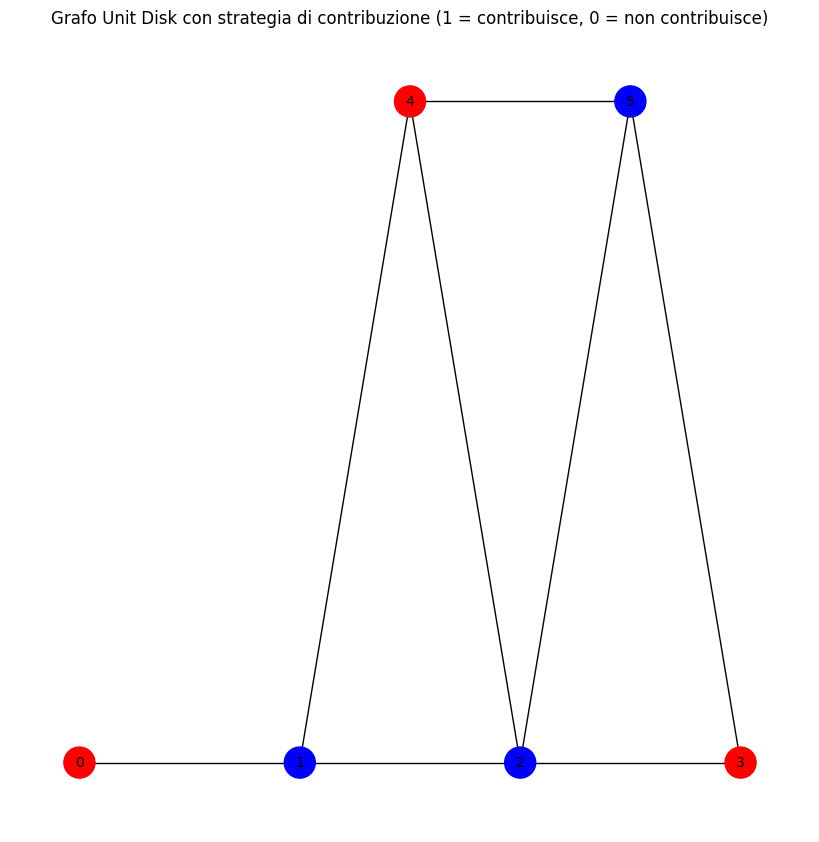

In [67]:
plot_grafo(posizioni, G, strategia_finale)

In [68]:
def verifica_robustezza_perturbazioni(G, strategia, costo_contribuzione, perturbazioni=5):
    strategia_corrente = strategia.copy()
    
    for _ in range(perturbazioni):
        # Introduci una perturbazione casuale (cambia casualmente la strategia di un nodo)
        nodo_perturbato = random.choice(list(G.nodes()))
        strategia_corrente[nodo_perturbato] = 1 - strategia_corrente[nodo_perturbato]
        
        # Esegui le iterazioni di Nash
        strategia_convergente = iterazioni_nash(G, strategia_corrente, num_iterazioni=100, costo_contribuzione=costo_contribuzione)
        
        # Se non torna alla strategia originale, non è robusta
        if strategia_convergente != strategia:
            print(f"La configurazione non è robusta: dopo una perturbazione su nodo {nodo_perturbato}, il sistema non ritorna all'equilibrio originale.")
            return False
    
    print("La configurazione è robusta: il sistema ritorna all'equilibrio originale dopo le perturbazioni.")
    return True

# Test della robustezza alle perturbazioni
is_robust = verifica_robustezza_perturbazioni(G, strategia_finale, costo_contribuzione)
print("Robustezza dell'equilibrio di Nash:", is_robust)


La configurazione non è robusta: dopo una perturbazione su nodo 3, il sistema non ritorna all'equilibrio originale.
Robustezza dell'equilibrio di Nash: False


In [69]:
def verifica_robustezza_perturbazioni(G, strategia, costo_contribuzione, num_perturbazioni=5, num_iterazioni=100):
    strategia_originale = strategia.copy()
    
    for i in range(num_perturbazioni):
        # Introduci una perturbazione casuale
        strategia_perturbata = strategia_originale.copy()
        nodo_perturbato = random.choice(list(G.nodes()))
        strategia_perturbata[nodo_perturbato] = 1 - strategia_perturbata[nodo_perturbato]  # Cambia strategia

        print(f"\nPerturbazione {i + 1}: Nodo {nodo_perturbato} cambiato. Strategia perturbata: {strategia_perturbata}")
        
        # Esegui le iterazioni di Nash sulla strategia perturbata
        strategia_convergente = iterazioni_nash(G, strategia_perturbata, num_iterazioni, costo_contribuzione)
        
        print(f"Strategia dopo iterazioni di Nash: {strategia_convergente}")

        # Verifica se il sistema ritorna alla strategia originale
        if strategia_convergente == strategia_originale:
            print("→ Il sistema è tornato alla configurazione originale.")
        else:
            print("→ Il sistema NON è tornato alla configurazione originale.")
            print(f"La nuova configurazione stabile è: {strategia_convergente}")
            return False  # La robustezza non è garantita

    print("Il sistema è robusto: tutte le perturbazioni testate ritornano all'equilibrio originale.")
    return True

# Test della robustezza alle perturbazioni
is_robust = verifica_robustezza_perturbazioni(G, strategia_finale, costo_contribuzione)
print("Robustezza dell'equilibrio di Nash:", is_robust)



Perturbazione 1: Nodo 2 cambiato. Strategia perturbata: [1, 0, 1, 1, 1, 0]
Strategia dopo iterazioni di Nash: [1, 0, 0, 1, 1, 0]
→ Il sistema è tornato alla configurazione originale.

Perturbazione 2: Nodo 3 cambiato. Strategia perturbata: [1, 0, 0, 0, 1, 0]
Strategia dopo iterazioni di Nash: [1, 0, 0, 1, 1, 0]
→ Il sistema è tornato alla configurazione originale.

Perturbazione 3: Nodo 3 cambiato. Strategia perturbata: [1, 0, 0, 0, 1, 0]
Strategia dopo iterazioni di Nash: [1, 0, 0, 1, 1, 0]
→ Il sistema è tornato alla configurazione originale.

Perturbazione 4: Nodo 1 cambiato. Strategia perturbata: [1, 1, 0, 1, 1, 0]
Strategia dopo iterazioni di Nash: [1, 0, 0, 1, 1, 0]
→ Il sistema è tornato alla configurazione originale.

Perturbazione 5: Nodo 0 cambiato. Strategia perturbata: [0, 0, 0, 1, 1, 0]
Strategia dopo iterazioni di Nash: [1, 0, 0, 1, 1, 0]
→ Il sistema è tornato alla configurazione originale.
Il sistema è robusto: tutte le perturbazioni testate ritornano all'equilibrio or

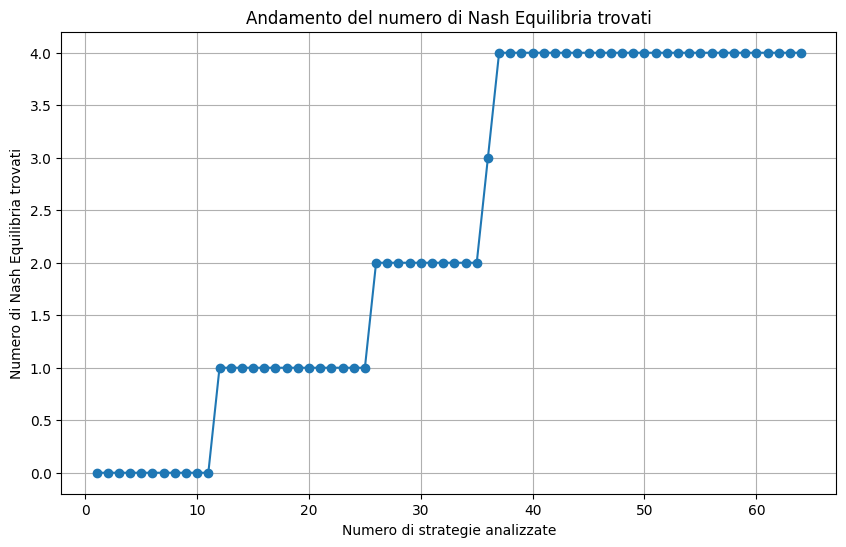

ModuleNotFoundError: No module named 'ace_tools'

In [70]:
import numpy as np
import networkx as nx
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random
import itertools
import pandas as pd

# Posizioni dei nodi e raggio di interazione
posizioni = [(0.0, 0.0), (0, 5), (5, 0), (5, 5), (2.5, 8), (10, 5)]
Rb = 5.2  # Raggio di interazione

# Parametri del gioco
costo_contribuzione = 0.5  # Costo che paga il giocatore che contribuisce (marginal cost c)

# Funzione di beneficio concava: b(x) = sqrt(x)
def funzione_beneficio(x):
    return np.sqrt(x)

# Calcola la matrice delle distanze
posizioni_array = np.array(posizioni)
distanze = distance_matrix(posizioni_array, posizioni_array)

# Crea un grafo in cui i nodi sono collegati se la distanza è <= Rb
G = nx.Graph()
for i in range(len(posizioni)):
    for j in range(i + 1, len(posizioni)):
        if distanze[i][j] <= Rb:
            G.add_edge(i, j)

# Funzione per calcolare il payoff di un singolo nodo
def calcola_payoff(G, strategia, nodo, costo_contribuzione):
    e_i = strategia[nodo]
    sforzi_vicini = sum(strategia[vicino] for vicino in G.neighbors(nodo))
    beneficio_totale = funzione_beneficio(e_i + sforzi_vicini)
    costo = e_i * costo_contribuzione
    payoff = beneficio_totale - costo
    return payoff

# Verifica se una strategia è un equilibrio di Nash
def verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
    for nodo in G.nodes():
        payoff_corrente = calcola_payoff(G, strategia, nodo, costo_contribuzione)
        strategia_alternativa = strategia.copy()
        strategia_alternativa[nodo] = 1 - strategia[nodo]
        payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
        if payoff_nuovo > payoff_corrente:
            return False
    return True

# Trova tutti i possibili equilibri di Nash
def trova_tutti_nash(G, costo_contribuzione):
    nodi = list(G.nodes())
    tutte_strategie = list(itertools.product([0, 1], repeat=len(nodi)))
    nash_equilibria = []
    for strategia in tutte_strategie:
        strategia = list(strategia)
        if verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
            nash_equilibria.append(strategia)
    return nash_equilibria

# Analisi iterativa per tracciare gli equilibri di Nash
iterazioni = []
nash_counts = []
nash_equilibria_iterativi = []

tutte_le_strategie = list(itertools.product([0, 1], repeat=len(G.nodes())))
for i, strategia in enumerate(tutte_le_strategie, start=1):
    strategia = list(strategia)
    if verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
        nash_equilibria_iterativi.append(strategia)
    iterazioni.append(i)
    nash_counts.append(len(nash_equilibria_iterativi))

# Grafico dell'andamento del numero di Nash Equilibria trovati
plt.figure(figsize=(10, 6))
plt.plot(iterazioni, nash_counts, marker='o')
plt.xlabel("Numero di strategie analizzate")
plt.ylabel("Numero di Nash Equilibria trovati")
plt.title("Andamento del numero di Nash Equilibria trovati")
plt.grid()
plt.show()

# Risultati finali: tutti i Nash Equilibria
nash_equilibria = trova_tutti_nash(G, costo_contribuzione)
nash_df = pd.DataFrame(nash_equilibria, columns=[f"Nodo {i}" for i in range(len(G.nodes()))])

import ace_tools as tools; tools.display_dataframe_to_user(name="Nash Equilibria Identificati", dataframe=nash_df)


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


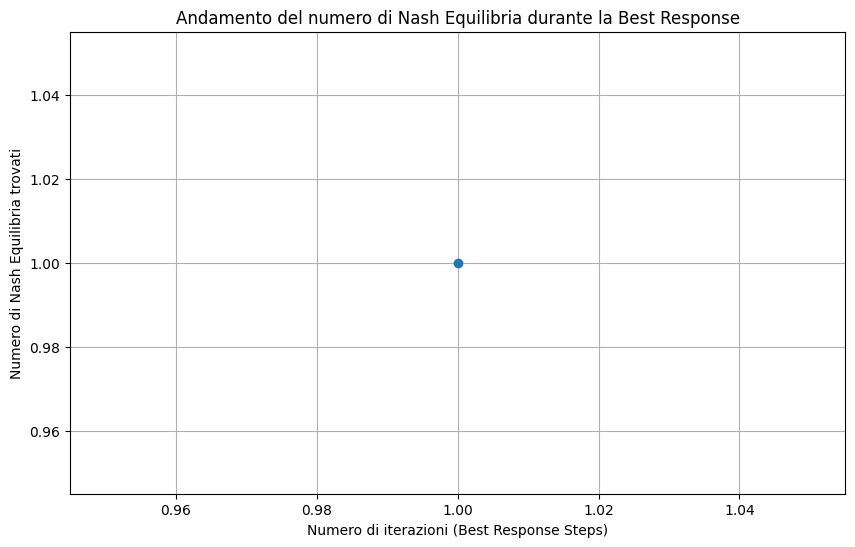

Nash Equilibria Trovati:
   Nodo 0  Nodo 1  Nodo 2  Nodo 3  Nodo 4  Nodo 5
0       1       0       0       0       1       1


In [ ]:
import numpy as np
import networkx as nx
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import random
import itertools
import pandas as pd

# Posizioni dei nodi e raggio di interazione
posizioni = [(0.0, 0.0), (0, 5), (5, 0), (5, 5), (2.5, 8), (10, 5)]
Rb = 5.2  # Raggio di interazione

# Parametri del gioco
costo_contribuzione = 0.5  # Costo che paga il giocatore che contribuisce (marginal cost c)
num_iterazioni = 100  # Numero massimo di iterazioni per raggiungere l'equilibrio di Nash

# Funzione di beneficio concava: b(x) = sqrt(x)
def funzione_beneficio(x):
    return np.sqrt(x)

# Calcola la matrice delle distanze
posizioni_array = np.array(posizioni)
distanze = distance_matrix(posizioni_array, posizioni_array)

# Crea un grafo in cui i nodi sono collegati se la distanza è <= Rb
G = nx.Graph()
for i in range(len(posizioni)):
    for j in range(i + 1, len(posizioni)):
        if distanze[i][j] <= Rb:
            G.add_edge(i, j)

# Funzione per calcolare il payoff di un singolo nodo
def calcola_payoff(G, strategia, nodo, costo_contribuzione):
    e_i = strategia[nodo]
    sforzi_vicini = sum(strategia[vicino] for vicino in G.neighbors(nodo))
    beneficio_totale = funzione_beneficio(e_i + sforzi_vicini)
    costo = e_i * costo_contribuzione
    payoff = beneficio_totale - costo
    return payoff

# Verifica se una strategia è un equilibrio di Nash
def verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
    for nodo in G.nodes():
        payoff_corrente = calcola_payoff(G, strategia, nodo, costo_contribuzione)
        strategia_alternativa = strategia.copy()
        strategia_alternativa[nodo] = 1 - strategia[nodo]
        payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
        if payoff_nuovo > payoff_corrente:
            return False
    return True

# Funzione per iterazioni della Best Response Dynamics
def iterazioni_best_response(G, strategia_iniziale, num_iterazioni, costo_contribuzione):
    strategia = strategia_iniziale.copy()
    step_counts = []  # Numero di iterazioni totali
    nash_counts = []  # Contatore dei Nash Equilibria trovati
    nash_equilibria = []  # Lista dei Nash Equilibria

    for step in range(num_iterazioni):
        for nodo in G.nodes():
            payoff_corrente = calcola_payoff(G, strategia, nodo, costo_contribuzione)
            strategia_alternativa = strategia.copy()
            strategia_alternativa[nodo] = 1 - strategia[nodo]
            payoff_nuovo = calcola_payoff(G, strategia_alternativa, nodo, costo_contribuzione)
            if payoff_nuovo > payoff_corrente:
                strategia[nodo] = strategia_alternativa[nodo]

        # Verifica se la strategia attuale è un Nash Equilibrium
        if verifica_nash_equilibrio_con_payoff(G, strategia, costo_contribuzione):
            if strategia not in nash_equilibria:  # Nuovo Nash Equilibrium trovato
                nash_equilibria.append(strategia.copy())
                step_counts.append(step + 1)  # Numero di step fino al nuovo Nash
                nash_counts.append(len(nash_equilibria))  # Numero totale di Nash trovati
                strategia = genera_strategia_iniziale(G)  # Ricomincia con una nuova strategia

    return step_counts, nash_counts, nash_equilibria

# Genera una strategia iniziale casuale
def genera_strategia_iniziale(G):
    return [random.choice([0, 1]) for _ in G.nodes()]

# Strategia iniziale casuale
strategia_iniziale = genera_strategia_iniziale(G)

# Eseguo la Best Response Dynamics monitorando gli step
step_counts, nash_counts, nash_equilibria = iterazioni_best_response(
    G, strategia_iniziale, num_iterazioni, costo_contribuzione
)

# Grafico dell'andamento dei Nash Equilibria trovati durante la Best Response
plt.figure(figsize=(10, 6))
plt.plot(step_counts, nash_counts, marker='o')
plt.xlabel("Numero di iterazioni (Best Response Steps)")
plt.ylabel("Numero di Nash Equilibria trovati")
plt.title("Andamento del numero di Nash Equilibria durante la Best Response")
plt.grid()
plt.show()

# Risultati finali: stampa tabellare dei Nash Equilibria trovati
nash_df = pd.DataFrame(nash_equilibria, columns=[f"Nodo {i}" for i in range(len(G.nodes()))])
print("Nash Equilibria Trovati:")
print(nash_df)